# TOR detection using NetTiSA flows

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


In [2]:
df = pd.read_csv("../final_datasets/tor_binary.csv")

In [3]:
df

,Unnamed: 0,SRC_IP,DST_IP,SRC_PORT,DST_PORT,TIME_FIRST,TIME_LAST,LABEL,PACKETS,PACKETS_REV,...,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_RELATIVE_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,0,82.161.239.177,10.0.2.15.,110,57188,1.437495e+09,1.437495e+09,True,11789,0,...,1330.931284,6.788683,0.633387,186.786784,294.901456,0.025017,0.000000,35.543898,1.467255,1.0
1,1,10.0.2.15,82.161.239.177.,57188,110,1.437495e+09,1.437495e+09,True,6269,0,...,237.589376,5.400178,0.629204,185.553901,294.902490,0.047049,0.000000,35.543523,0.536694,1.0
2,2,82.161.239.177,10.0.2.15.,110,57188,1.437495e+09,1.437495e+09,True,11207,0,...,1333.289968,6.813601,0.547053,163.881194,299.571058,0.026733,0.000000,45.360642,1.440835,1.0
3,3,10.0.2.15,82.161.239.177.,57188,110,1.437495e+09,1.437495e+09,True,5939,0,...,239.251682,5.082190,0.549039,164.497330,299.609362,0.050456,0.000020,45.360370,0.537555,1.0
4,4,82.161.239.177,10.0.2.15.,110,57188,1.437495e+09,1.437495e+09,True,5,0,...,468.620742,0.743570,0.335437,13.079405,38.992125,9.748031,0.000709,30.103271,2.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120735,120735,10.152.152.11,54.235.136.66.,37418,80,1.438015e+09,1.438015e+09,False,4,0,...,342.959181,1.317366,0.274696,0.197029,0.717262,0.239087,0.002701,0.649108,1.333333,1.0
120736,120736,54.235.136.66,10.152.152.11.,443,58937,1.438015e+09,1.438015e+09,False,11,0,...,835.813920,1.551365,0.445107,0.578065,1.298709,0.129871,0.000018,0.394541,1.600000,1.0
120737,120737,54.235.136.66,10.152.152.11.,80,37418,1.438015e+09,1.438015e+09,False,3,0,...,165.054536,0.666667,0.364418,0.260413,0.714599,0.357299,0.066639,0.647960,1.000000,1.0
120738,120738,10.152.152.11,54.72.254.110.,51996,80,1.438015e+09,1.438015e+09,False,5,0,...,606.564259,2.081490,0.399299,0.180526,0.452106,0.113026,0.000434,0.447536,1.000000,1.0


In [303]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "KURTOSIS",
    "TIME_DISTRIBUTION",
    "MEAN_RELATIVE_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
]

In [304]:
import sklearn
pd.set_option('display.max_columns', None)

df = df[["LABEL"] + features].copy()

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes

In [305]:
df

,LABEL,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,STDEV,VAR,BURSTINESS,MIN,MAX,MIN_MINUS_MAX,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS,LABEL_code
0,True,11789,0,14196377,0,1264,416.145407,173177,-0.504632,60,1480,1420,32.922896,267,21.123418,1330.931284,6.788683,0.633387,186.786784,294.901456,0.025017,0.000000,35.543898,1.467255,1.0,1
1,True,6269,0,495614,0,139,192.657728,37117,0.161786,60,1117,1057,138.602682,135,97.122302,237.589376,5.400178,0.629204,185.553901,294.902490,0.047049,0.000000,35.543523,0.536694,1.0,1
2,True,11207,0,13526839,0,1266,415.198748,172391,-0.506068,60,1480,1420,32.796110,266,21.011058,1333.289968,6.813601,0.547053,163.881194,299.571058,0.026733,0.000000,45.360642,1.440835,1.0,1
3,True,5939,0,478868,0,140,193.571692,37470,0.160600,60,1117,1057,138.265494,136,97.142857,239.251682,5.082190,0.549039,164.497330,299.609362,0.050456,0.000020,45.360370,0.537555,1.0,1
4,True,5,0,1629,0,385,297.412172,88455,-0.128350,60,603,543,77.249915,260,67.532468,468.620742,0.743570,0.335437,13.079405,38.992125,9.748031,0.000709,30.103271,2.000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120735,False,4,0,618,0,214,309.000000,95481,0.181644,60,678,618,144.392523,231,107.943925,342.959181,1.317366,0.274696,0.197029,0.717262,0.239087,0.002701,0.649108,1.333333,1.0,0
120736,False,11,0,5784,0,585,625.253549,390942,0.033260,60,1520,1460,106.880948,516,88.205128,835.813920,1.551365,0.445107,0.578065,1.298709,0.129871,0.000018,0.394541,1.600000,1.0,0
120737,False,3,0,213,0,131,122.975607,15123,-0.031595,60,273,213,93.874509,94,71.755725,165.054536,0.666667,0.364418,0.260413,0.714599,0.357299,0.066639,0.647960,1.000000,1.0,0
120738,False,5,0,1291,0,318,577.352579,333336,0.289665,60,1351,1291,181.557415,413,129.874214,606.564259,2.081490,0.399299,0.180526,0.452106,0.113026,0.000434,0.447536,1.000000,1.0,0


In [306]:
print(f"tor: {len(df[df['LABEL'] == True])}\tclear: {len(df[df['LABEL'] == False])}")

tor: 1260	clear: 119480


In [307]:
df = df[["LABEL_code"] + features].copy()

In [308]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [309]:
print(f"tor: {len(df[df['LABEL_code'] == 1])}\tclear: {len(df[df['LABEL_code'] == 0])}")

tor: 1188	clear: 116504


In [310]:
df_validation = df.sample(n = 10000)
df_features =  df[~df.isin(df_validation)].dropna()

In [311]:
df_features

,LABEL_code,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,STDEV,VAR,BURSTINESS,MIN,MAX,MIN_MINUS_MAX,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,1.0,11789.0,0.0,14196377.0,0.0,1264.0,416.145407,173177.0,-0.504632,60.0,1480.0,1420.0,32.922896,267.0,21.123418,1330.931284,6.788683,0.633387,186.786784,294.901456,0.025017,0.000000,35.543898,1.467255,1.0
1,1.0,6269.0,0.0,495614.0,0.0,139.0,192.657728,37117.0,0.161786,60.0,1117.0,1057.0,138.602682,135.0,97.122302,237.589376,5.400178,0.629204,185.553901,294.902490,0.047049,0.000000,35.543523,0.536694,1.0
2,1.0,11207.0,0.0,13526839.0,0.0,1266.0,415.198748,172391.0,-0.506068,60.0,1480.0,1420.0,32.796110,266.0,21.011058,1333.289968,6.813601,0.547053,163.881194,299.571058,0.026733,0.000000,45.360642,1.440835,1.0
3,1.0,5939.0,0.0,478868.0,0.0,140.0,193.571692,37470.0,0.160600,60.0,1117.0,1057.0,138.265494,136.0,97.142857,239.251682,5.082190,0.549039,164.497330,299.609362,0.050456,0.000020,45.360370,0.537555,1.0
4,1.0,5.0,0.0,1629.0,0.0,385.0,297.412172,88455.0,-0.128350,60.0,603.0,543.0,77.249915,260.0,67.532468,468.620742,0.743570,0.335437,13.079405,38.992125,9.748031,0.000709,30.103271,2.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120735,0.0,4.0,0.0,618.0,0.0,214.0,309.000000,95481.0,0.181644,60.0,678.0,618.0,144.392523,231.0,107.943925,342.959181,1.317366,0.274696,0.197029,0.717262,0.239087,0.002701,0.649108,1.333333,1.0
120736,0.0,11.0,0.0,5784.0,0.0,585.0,625.253549,390942.0,0.033260,60.0,1520.0,1460.0,106.880948,516.0,88.205128,835.813920,1.551365,0.445107,0.578065,1.298709,0.129871,0.000018,0.394541,1.600000,1.0
120737,0.0,3.0,0.0,213.0,0.0,131.0,122.975607,15123.0,-0.031595,60.0,273.0,213.0,93.874509,94.0,71.755725,165.054536,0.666667,0.364418,0.260413,0.714599,0.357299,0.066639,0.647960,1.000000,1.0
120738,0.0,5.0,0.0,1291.0,0.0,318.0,577.352579,333336.0,0.289665,60.0,1351.0,1291.0,181.557415,413.0,129.874214,606.564259,2.081490,0.399299,0.180526,0.452106,0.113026,0.000434,0.447536,1.000000,1.0


In [312]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [313]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred)
        if verbose is True:
            print ("SCORE:", accuracy)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 50, 5),
        'gamma': hp.uniform ('gamma', 1,20),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 50, 400, 50),
        # 'subsample': hp.quniform('subsample', 3, 40, 1),
        'eta': hp.quniform('eta', 0.005, 0.5, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [314]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

100%|██████████| 100/100 [02:33<00:00,  1.53s/trial, best loss: -0.8523489932885906]
The best hyperparameters are :  

{'colsample_bytree': 0.1293016303908501, 'eta': 0.38, 'gamma': 2.8225713803969796, 'max_depth': 20.0, 'min_child_weight': 1.0, 'n_estimators': 350.0, 'reg_alpha': 4.0, 'reg_lambda': 0.2388382585920235}


In [315]:
def XGBoost_classification_tunned(best_hyperparams):
      X=df_features[features]  # Features
      y=df_features['LABEL_code']  # Labels
      # #Split on train and test
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
      
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
            gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
      precision = precision_score(y_test, y_pred)  * 100
      recall = recall_score(y_test, y_pred)  * 100
      F1 = f1_score(y_test, y_pred)  * 100
      print("{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

99.79 & 97.81 & 81.46 & 88.89 \\


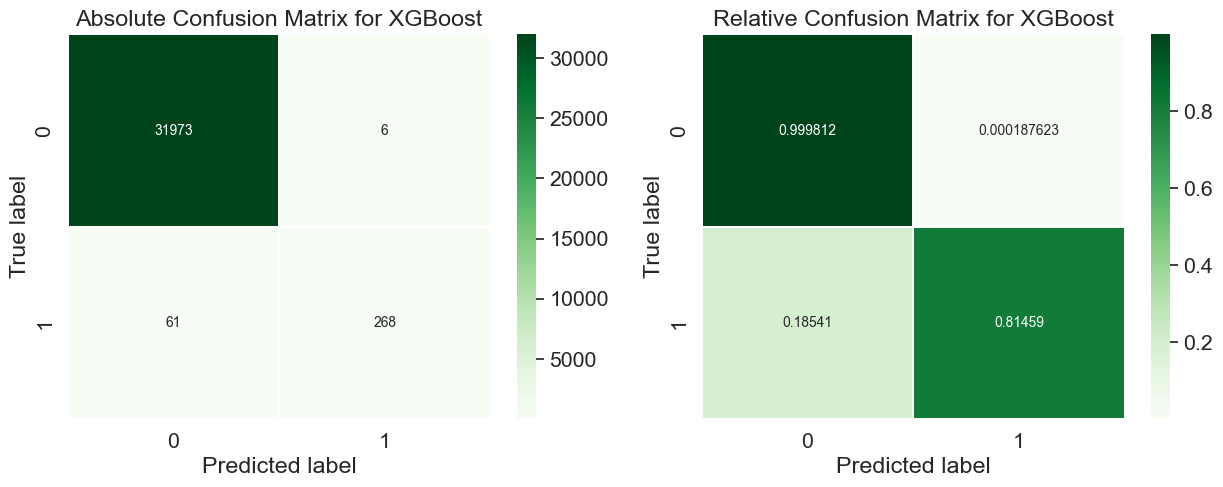

In [316]:
model = XGBoost_classification_tunned(best_hyperparams)

In [317]:

def while_XGBoost_classification_tunned(best_hyperparams, cycles=100, verbose=True):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best_results = (0,"",None,None, None, None, None, None, None)
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
        model = XGBClassifier(
                        n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
                        gamma = best_hyperparams['gamma'],
                        reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                        colsample_bytree=int(best_hyperparams['colsample_bytree']),
                        # subsample=int(best_hyperparams['subsample']),
                        eta=best_hyperparams['eta'],
                )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
        precision = precision_score(y_test, y_pred)  * 100
        recall = recall_score(y_test, y_pred)  * 100
        F1 = f1_score(y_test, y_pred)  * 100
        if best_results[0] < F1:
            matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
            best_results = (F1, "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1), matrix, percentage_matrix, model, X_train, y_train, X_test, y_test)
    if verbose is True:
        print("")
        print("")
        print("")
        print(best_results[0])
        print(best_results[1])
        plot_confusion_matrix(best_results[2], best_results[3], model="XGBoost")
    return best_results[4], best_results[5], best_results[6], best_results[7], best_results[8]

24


91.9093851132686
99.85 & 98.27 & 86.32 & 91.91 \\


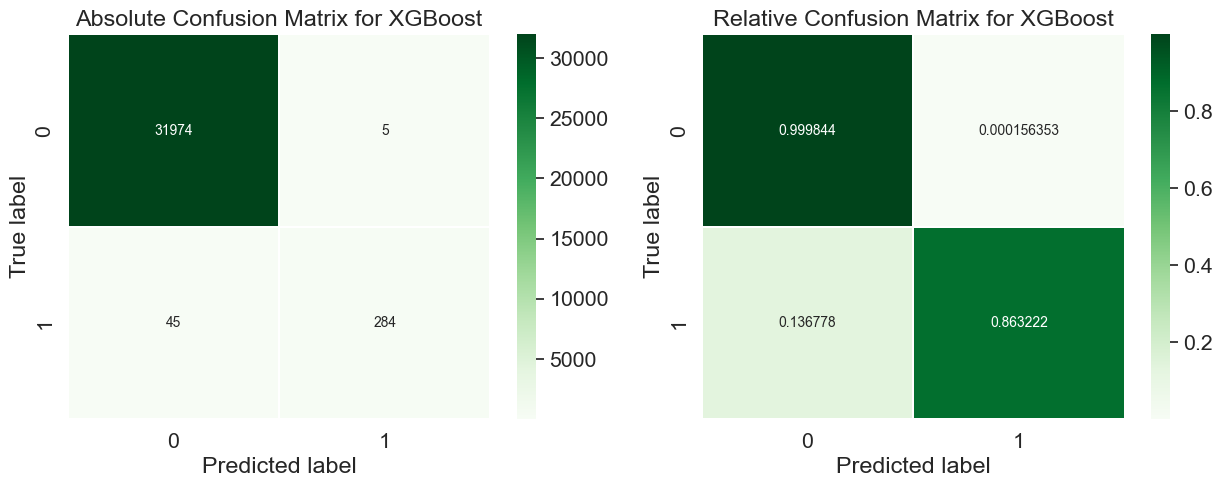

In [318]:
best_model, X_train, y_train, X_test, y_test = while_XGBoost_classification_tunned(best_hyperparams, cycles=25)

# Validation

\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.89 & 100.00 & 87.91 & 93.57 \\
\hline



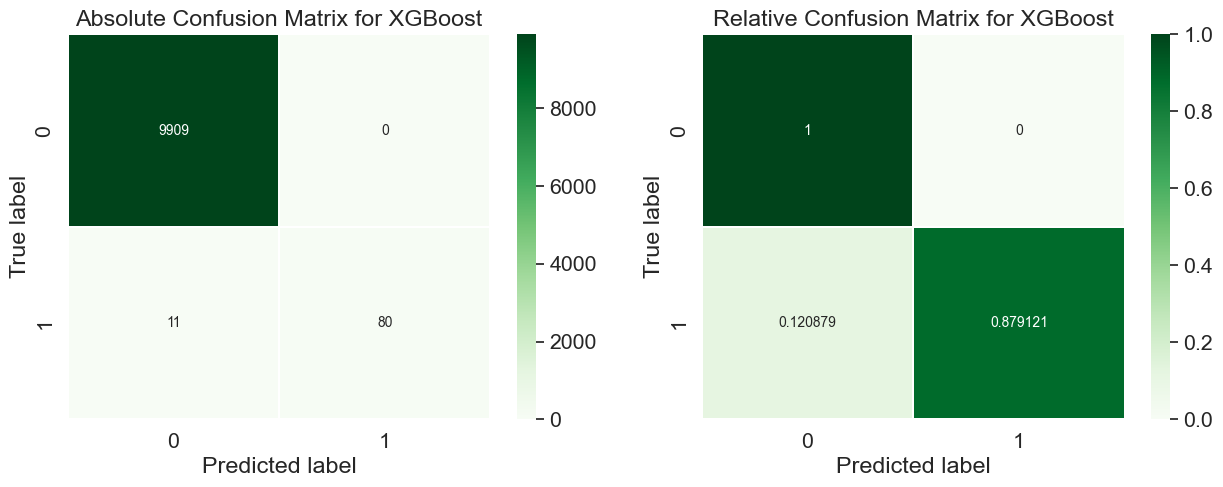

In [319]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels


y_pred = best_model.predict(X_validation)
accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
precision = precision_score(y_validation, y_pred)  * 100
recall = recall_score(y_validation, y_pred)  * 100
F1 = f1_score(y_validation, y_pred)  * 100
                
tmp_str = ""
tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
tmp_str += "\n"
tmp_str += "\hline"
tmp_str += "\n"
print(tmp_str)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

## Feature importance

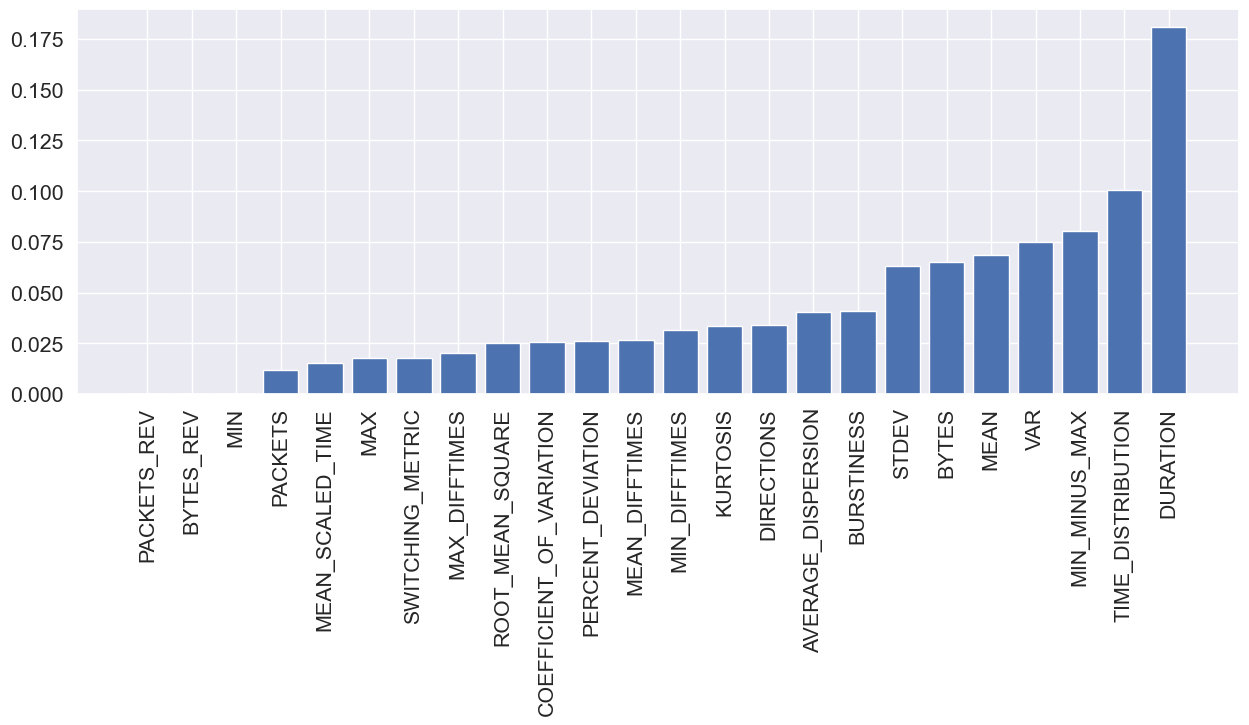

In [320]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [321]:
feat_importances.to_dict()

{'PACKETS_REV': 0.0,
 'BYTES_REV': 0.0,
 'MIN': 0.0,
 'PACKETS': 0.011913185007870197,
 'MEAN_SCALED_TIME': 0.015437525697052479,
 'MAX': 0.017736325040459633,
 'SWITCHING_METRIC': 0.01776886358857155,
 'MAX_DIFFTIMES': 0.020191268995404243,
 'ROOT_MEAN_SQUARE': 0.025251757353544235,
 'COEFFICIENT_OF_VARIATION': 0.02579164318740368,
 'PERCENT_DEVIATION': 0.026199348270893097,
 'MEAN_DIFFTIMES': 0.026729930192232132,
 'MIN_DIFFTIMES': 0.031691569834947586,
 'KURTOSIS': 0.03341742604970932,
 'DIRECTIONS': 0.03382979333400726,
 'AVERAGE_DISPERSION': 0.0403350293636322,
 'BURSTINESS': 0.040709398686885834,
 'STDEV': 0.06285445392131805,
 'BYTES': 0.06520835310220718,
 'MEAN': 0.0684003084897995,
 'VAR': 0.07489906996488571,
 'MIN_MINUS_MAX': 0.08035212010145187,
 'TIME_DISTRIBUTION': 0.10064737498760223,
 'DURATION': 0.1806352287530899}